# Statistical Analysis for the Residential Property Listings in the Greater Toronto Area (GTA, Canada)

Objectives:

1. Demonstrate the applicability of the Central Limit Theorem on the dataset (scraped in one of our previous projects) containing property prices in GTA. 

2. Estimate the mean property price (i.e. the population mean) in GTA and construct the 95 % confidence interval for the population mean price using the Central Limit Theorem.

3. Perform the statistical Z-test on the randomly selected 50 samples from the three regions 'Kitchener', 'Scugog' and 'Richmond Hill' to check if the mean property price in these regions is significantly different compared to the population mean.

4. Perform the statistical T-test on all the regions in GTA to determine if their mean property price is significantly different compared to the population mean.

5. Perform the two-sample T-test on the following pairs of regions to check if the mean property prices in these regions differ from each other.

      ['King, ON', 'Oakville, ON']

      ['Brampton, ON', 'Mississauga, ON']

      ['Oshawa, ON', 'Ajax, ON']

      ['Aurora, ON', 'Richmond Hill, ON']


Import the required packages.

In [1]:
import os
import time
import math
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
t0 = time.time()

# Demonstration of the applicability of the Central Limit Theorem on the dataset.

In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up (or the mean of independent variables), their sum/mean tends toward a normal distribution even if the original variables themselves are not normally distributed.

For example, suppose a sample is obtained containing many observations from a given population, each observation being randomly generated in a way that does not depend on the values of the other observations, and that the arithmetic mean of the observed values is computed. If this procedure is performed many times, the central limit theorem states that the probability distribution of the average will closely approximate a normal distribution. 

If the population mean  and population standard deviation are $\mu$ and $\sigma$ respectively, and if each randomly selected sample has a size n, then the distribution of sample means will be normally distributed. This normal distribution will have a mean $\mu$ _bar = $\mu$ and the standard deviation $\sigma$ _bar = $\sigma$ / √n

To demonstrate CLT, we will utilize the dataset consisting of property prices in the Greater Toronto Area. This dataset was scraped from the https://www.realtor.ca/ website, and the details are given in the GitHub repository https://github.com/Mangaljit/Toronto_Property_Prices_Analysis 

Import the dataset.

In [3]:
data = pd.read_excel(os.getcwd()+"/clean_combined_toronto_property_data.xlsx")
data.head()

,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999


Check missing values.

In [4]:
data.isna().sum()

price        0
region       0
address      0
bedrooms     0
bathrooms    0
pricem       0
dtype: int64

In [5]:
prices = data.pricem

We can see that the population (property prices) is not normally distributed.

(0.0, 6.0)

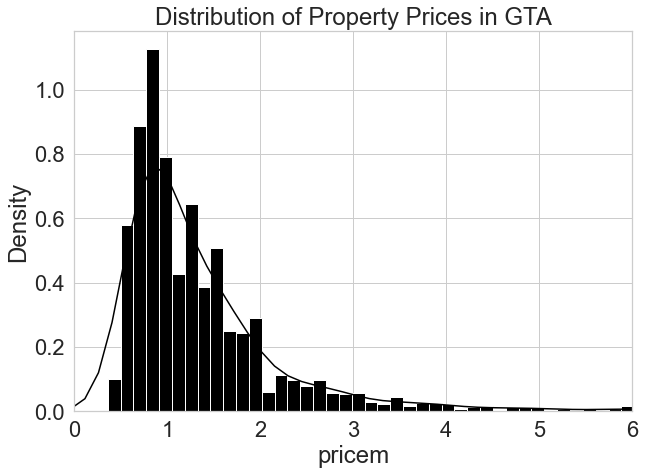

In [6]:
sns.set(font_scale= 2)
sns.set_style('whitegrid')
plt.figure(figsize= (10,7))
plt.title('Distribution of Property Prices in GTA')
sns.distplot(prices, kde = True, color = 'black', hist_kws=dict(alpha=1), bins = 200)
plt.xlim(0,6)

We can further verify using the Q-Q plot if the dataset is normally distributed.

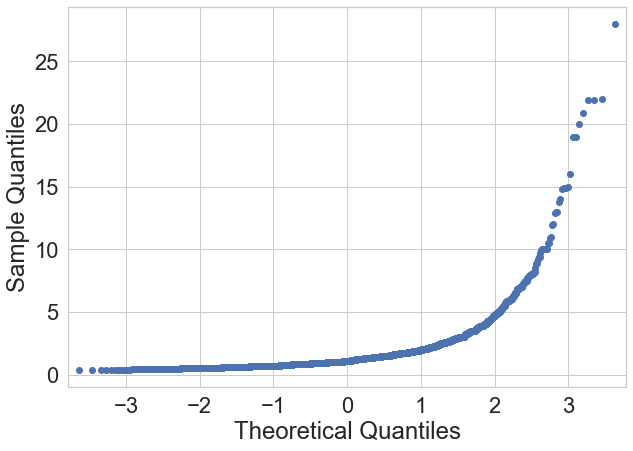

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
fig = sm.qqplot(prices, ax = ax)

As expected, the Q-Q plot doesn't show a linear relationship, which is an indication of the price distribution not being normally distributed.

Below, we take random samples from the property prices, with sample size indicated by the parameter **sample_size**. The parameter **samples** indicates the total number of random samples.

In [8]:
sample_size = [5, 10, 30, 50, 100, 300]
samples = 500
np.random.seed(2)
all_means = []
for size in sample_size:
    means = []
    for index in range(0, samples):
        mean = np.mean(np.random.choice(prices.to_list(), size, replace = True))
        means.append(mean)
    all_means.append(means)

We plot the distribution of means for various randomly selected samples.

Text(0.5, 0, 'price')

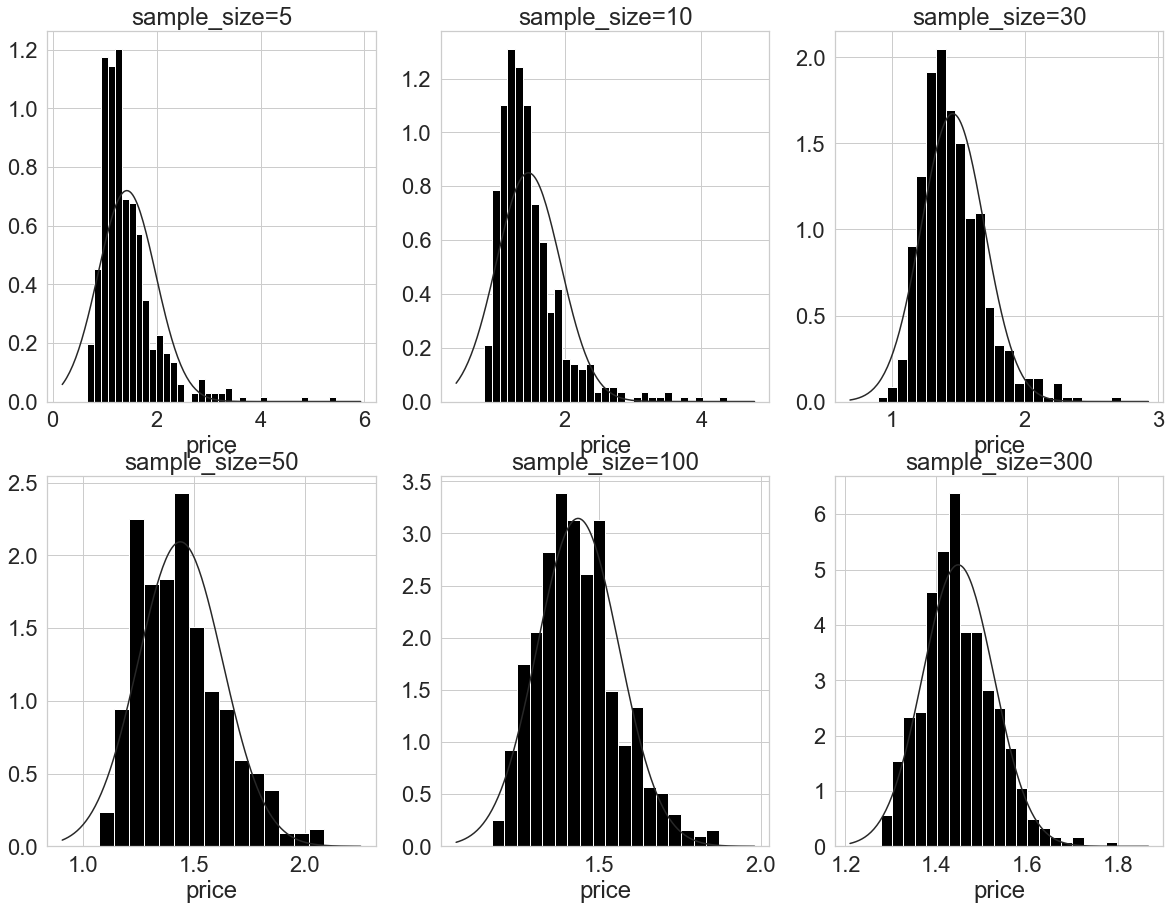

In [9]:
fig, axes = plt.subplots(2, 3, figsize = (20, 15))
sns.distplot(all_means[0], kde = False, color = 'black', hist_kws=dict(alpha=1), ax = axes[0,0], fit = stats.norm)
axes[0, 0].set_title('sample_size=' +str(sample_size[0]))
axes[0, 0].set_xlabel('price')
sns.distplot(all_means[1], kde = False, color = 'black', hist_kws=dict(alpha=1), ax = axes[0,1], fit = stats.norm)
axes[0, 1].set_title('sample_size=' +str(sample_size[1]))
axes[0, 1].set_xlabel('price')
sns.distplot(all_means[2], kde = False, color = 'black', hist_kws=dict(alpha=1), ax = axes[0,2], fit = stats.norm)
axes[0, 2].set_title('sample_size=' +str(sample_size[2]))
axes[0, 2].set_xlabel('price')
sns.distplot(all_means[3], kde = False, color = 'black', hist_kws=dict(alpha=1), ax = axes[1,0], fit = stats.norm)
axes[1, 0].set_title('sample_size=' +str(sample_size[3]))
axes[1, 0].set_xlabel('price')
sns.distplot(all_means[4], kde = False, color = 'black', hist_kws=dict(alpha=1), ax = axes[1,1], fit = stats.norm)
axes[1, 1].set_title('sample_size=' +str(sample_size[4]))
axes[1, 1].set_xlabel('price')
sns.distplot(all_means[5], kde = False, color = 'black', hist_kws=dict(alpha=1), ax = axes[1,2], fit = stats.norm)
axes[1, 2].set_title('sample_size=' +str(sample_size[5]))
axes[1, 2].set_xlabel('price')

We can see that the distribution of means tends towards normal distribution better as the sample size is increased.

Below, we can confirm the same using Q-Q plots.

Text(0.5, 1.0, 'sample_size=300')

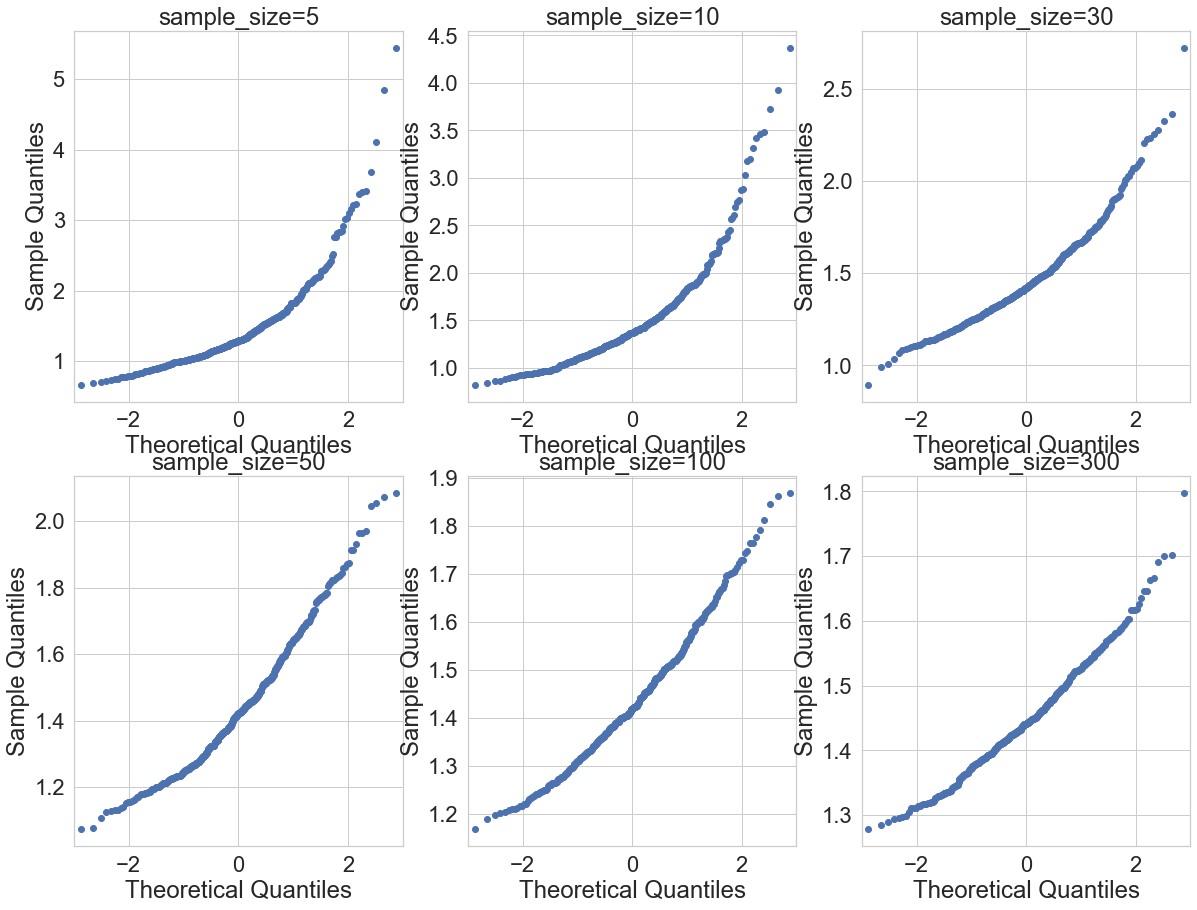

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (20, 15))
fig = sm.qqplot(np.array(all_means[0]), ax = axes[0, 0])
axes[0, 0].set_title('sample_size=' +str(sample_size[0]))
fig = sm.qqplot(np.array(all_means[1]), ax = axes[0, 1])
axes[0, 1].set_title('sample_size=' +str(sample_size[1]))
fig = sm.qqplot(np.array(all_means[2]), ax = axes[0, 2])
axes[0, 2].set_title('sample_size=' +str(sample_size[2]))
fig = sm.qqplot(np.array(all_means[3]), ax = axes[1, 0])
axes[1, 0].set_title('sample_size=' +str(sample_size[3]))
fig = sm.qqplot(np.array(all_means[4]), ax = axes[1, 1])
axes[1, 1].set_title('sample_size=' +str(sample_size[4]))
fig = sm.qqplot(np.array(all_means[5]), ax = axes[1, 2])
axes[1,2].set_title('sample_size=' +str(sample_size[5]))

# Estimate the mean property price in GTA and construct the 95 % confidence interval.

Let's summarize the estimated mean and estimated standard deviation.

In [11]:
summary = pd.DataFrame({
    'Sample size (n)' : [],
    'Population mean (µ)' : [],
    'Population std. dev. (σ)': [],
    'Sample mean (µ_bar)' : [],
    'σ_bar = Std. dev. of n samples' : [],
    'estimated population std. dev. (σ_bar × √n)' : []
})
for index in range(0,6):
    summary_i = pd.DataFrame({
        'Sample size (n)' : [sample_size[index]],
        'Population mean (µ)' : [np.mean(prices)],
        'Population std. dev. (σ)': [np.std(prices)],
        'Sample mean (µ_bar)' : [np.mean(all_means[index])],
        'σ_bar = Std. dev. of n samples' : [np.std(all_means[index])],
        'estimated population std. dev. (σ_bar × √n)' : np.std(all_means[index])*math.sqrt(sample_size[index])
    })
    summary = pd.concat([summary, summary_i])
summary

,Sample size (n),Population mean (µ),Population std. dev. (σ),Sample mean (µ_bar),σ_bar = Std. dev. of n samples,estimated population std. dev. (σ_bar × √n)
0,5.0,1.444227,1.347433,1.426556,0.554315,1.239486
0,10.0,1.444227,1.347433,1.471755,0.469427,1.484459
0,30.0,1.444227,1.347433,1.459763,0.238418,1.305867
0,50.0,1.444227,1.347433,1.439583,0.190556,1.347435
0,100.0,1.444227,1.347433,1.434466,0.126890,1.268903
0,300.0,1.444227,1.347433,1.447909,0.078458,1.358935


We clearly see that the estimated value of mean and standard deviation using CLT are very close to the actual value of mean and standard deviation of the population.

## Confidence Interval

A confidence interval is a range of estimates for an unknown parameter. In our example, we are trying to estimate the mean of the population using CLT. However, the estimated value is usually an interval but not the exact single value. In the data frame shown above, we have only shown the one single value of the estimate. This estimate was evaluate as the mean of the normal distribution of the sample means. However, the distribution has a spread, and the estimated value of mean can be anywhere within the distribution. The typical value of confidence interval is usually the 95% of the spread around the centre of the normal distribution.

This implies that confidence interval should be (µ_bar $\pm$ Zc $\times$ σ_bar). The value of Zc (critical value) depends on the percentage value considered to construct the confidence interval. The value of Z is ~1.96 for the 95% confidence interval with normal distribution.

For 95 % confidence interval, the Zc value will be:

In [12]:
zc = stats.norm.ppf(0.975)
zc

1.959963984540054

We can verify if this value provides 95 % area under the normal curve.

In [13]:
stats.norm.cdf(zc)-stats.norm.cdf(-zc)

0.95

Below we show the calculated confidence intervals:

In [14]:
summary = pd.DataFrame({
    'Sample size (n)' : [],
    'Population mean (µ)' : [],
    'Population std. dev. (σ)': [],
    'Sample mean (µ_bar)' : [],
    'σ_bar = Std. dev. of n samples' : [],
    'lower bound of confidence interval' : [],
    'upper bound of confidence interval' : []
})
for index in range(0,6):
    summary_i = pd.DataFrame({
        'Sample size (n)' : [sample_size[index]],
        'Population mean (µ)' : [np.mean(prices)],
        'Population std. dev. (σ)': [np.std(prices)],
        'Sample mean (µ_bar)' : [np.mean(all_means[index])],
        'σ_bar = Std. dev. of n samples' : [np.std(all_means[index])],
        'lower bound of confidence interval' : np.mean(all_means[index]) - zc*np.std(all_means[index]),
        'upper bound of confidence interval' : np.mean(all_means[index]) + zc*np.std(all_means[index])
    })
    summary = pd.concat([summary, summary_i])
summary

,Sample size (n),Population mean (µ),Population std. dev. (σ),Sample mean (µ_bar),σ_bar = Std. dev. of n samples,lower bound of confidence interval,upper bound of confidence interval
0,5.0,1.444227,1.347433,1.426556,0.554315,0.340118,2.512993
0,10.0,1.444227,1.347433,1.471755,0.469427,0.551695,2.391815
0,30.0,1.444227,1.347433,1.459763,0.238418,0.992473,1.927053
0,50.0,1.444227,1.347433,1.439583,0.190556,1.066100,1.813066
0,100.0,1.444227,1.347433,1.434466,0.126890,1.185765,1.683167
0,300.0,1.444227,1.347433,1.447909,0.078458,1.294134,1.601684


As we can see, the confidence interval get narrower with larger sample size.

# Z-test on the randomly selected 50 samples from the three regions 'Kitchener', 'Scugog' and 'Richmond Hill'.

If the population mean and population standard deviation is given, the Z test is useful to check if the mean of a randomly selected sample from the population is significantly different from the population mean.


In [15]:
mu = np.mean(prices)
print('The population mean is:')
print(round(mu, 4))
print('The population standard deviation is:')
sigma = np.std(prices)
print(round(sigma, 4))

The population mean is:
1.4442
The population standard deviation is:
1.3474


For the Z-test, we need to define a significance value or the confidence interval. Typical value chosen in 95% confidence interval.

For the demonstration purpose, we will take a random sample of a given size from different regions of Greater Toronto Area, and perform the Z-test to check if the sample mean is different from the population mean.

Below are the different regions in Greater Toronto Area.

In [16]:
data.region.unique()

array(['Ajax, ON', 'Clarington, ON', 'Brock, ON', 'Oshawa, ON',
       'Pickering, ON', 'Scugog, ON', 'Uxbridge, ON', 'Whitby, ON',
       'Burlington, ON', 'Halton Hills, ON', 'Milton, ON', 'Oakville, ON',
       'Brampton, ON', 'Caledon, ON', 'Mississauga, ON', 'Aurora, ON',
       'East Gwillimbury, ON', 'Georgina, ON', 'King, ON', 'Markham, ON',
       'Newmarket, ON', 'Richmond Hill, ON', 'Vaughan, ON',
       'Whitchurch-Stouffville, ON', 'Old Toronto, Toronto, ON',
       'Hamilton, ON', 'Guelph, ON', 'Kitchener, ON', 'Cambridge, ON',
       'Brantford, ON', 'Scarborough, Toronto, ON'], dtype=object)

We take random samples from three regions. We evaluate the z-score and the corresponding p-value (defined as the area under the normal distribution curve). The Null hypothesis is that the mean of the random sample and the population mean are the same. The Alternate hypothesis is that the mean of the random sample and the population mean are different. This therefore will be a two-tailed test.

For 95 % confidence interval, if p < 0.05, we reject the Null hypothesis.

In [17]:
regions = ['Kitchener, ON', 'Scugog, ON', 'Richmond Hill, ON'] #three chosen regions
test_size = 50 #sample size
for region in regions:
    prices = data[data.region == region].pricem
    np.random.seed(5)
    test_sample = np.random.choice(prices, test_size)
    test_mean = np.mean(test_sample)
    print('-----------------------')
    print('Mean of the randomly selected sample of size', test_size, 'from the',region[:-4], 'region is',round(test_mean, 4))
    z_score = (test_mean - mu)*math.sqrt(test_size)/(sigma)
    if z_score < 0:
        p = 2*stats.norm.cdf(z_score) 
        print('The z-score is',round(z_score, 5))
        print('The corresponding p value is',p)
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('In this case, p > 0.05 for the 95 percent confidence interval.')
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')
    elif z_score == 0:
        p = stats.norm.cdf(0) 
        print('The z-score is',round(z_score, 5))
        print('The corresponding p value is', p)
        print('')
        if p < 0.025:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')
    else:
        p = 2*(1-stats.norm.cdf(z_score)) 
        print('The z-score is',round(z_score, 5))
        print('The corresponding p value is', p)
        print('')
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('In this case, p > 0.05 for the 95 percent confidence interval.')
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')

-----------------------
Mean of the randomly selected sample of size 50 from the Kitchener region is 0.7875
The z-score is -3.44637
The corresponding p value is 0.0005681710772134198

In this case, p < 0.05 for the 95 percent confidence interval.
We reject the Null Hypothesis.
The mean of the sample is significantly different from the population mean.
-----------------------
Mean of the randomly selected sample of size 50 from the Scugog region is 1.6278
The z-score is 0.96348
The corresponding p value is 0.33530675402026455


In this case, p > 0.05 for the 95 percent confidence interval.
We have no evidence to reject the Null Hypothesis.
The mean of the sample is similar the population mean.
-----------------------
Mean of the randomly selected sample of size 50 from the Richmond Hill region is 2.117
The z-score is 3.53072
The corresponding p value is 0.0004144255891818105


In this case, p < 0.05 for the 95 percent confidence interval.
We reject the Null Hypothesis.
The mean of the s

# T-test on all the regions in GTA to determine if their mean property price is significantly different compared to the population mean.

In many real-world problems, the population standard deviation is not available. In such situations, a t-test becomes handy, where the population standard deviation is estimated from the sample itself.

We again take random samples from three regions. We evaluate the t-score and the corresponding p-value (defined as the area under the t distribution curve). The Null hypothesis is that the mean of the random sample and the population mean are the same. The Alternate hypothesis is that the mean of the random sample and the population mean are different. This therefore will be a two-tailed test.

In [18]:
regions = ['Kitchener, ON', 'Scugog, ON', 'Richmond Hill, ON'] #three chosen regions
test_size = 50 #sample size
for region in regions:
    prices = data[data.region == region].pricem
    np.random.seed(5)
    test_sample = np.random.choice(prices, test_size)
    test_mean = np.mean(test_sample)
    test_std = np.std(test_sample)
    print('-----------------------')
    print('Mean of the randomly selected sample of size', test_size, 'from the',region[:-4], 'region is',round(test_mean, 4))
    t_score = (test_mean - mu)*math.sqrt(test_size)/(test_std)
    if t_score < 0:
        p = 2*stats.t.cdf(t_score, df = test_size - 1) 
        print('The t-score is',round(t_score, 5))
        print('The corresponding p value is', p)
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('In this case, p > 0.05 for the 95 percent confidence interval.')
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')
    elif t_score == 0:
        p = stats.t.cdf(0, df = test_size - 1) 
        print('The t-score is',round(t_score, 5))
        print('The corresponding p value is', p)
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')
    else:
        p = 2*(1-stats.t.cdf(t_score, df = test_size - 1))
        print('The t-score is',round(t_score, 5))
        print('The corresponding p value is', p)
        print('')
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('In this case, p > 0.05 for the 95 percent confidence interval.')
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')

-----------------------
Mean of the randomly selected sample of size 50 from the Kitchener region is 0.7875
The t-score is -15.78989
The corresponding p value is 7.44712459174636e-21

In this case, p < 0.05 for the 95 percent confidence interval.
We reject the Null Hypothesis.
The mean of the sample is significantly different from the population mean.
-----------------------
Mean of the randomly selected sample of size 50 from the Scugog region is 1.6278
The t-score is 1.4152
The corresponding p value is 0.1633351533761176


In this case, p > 0.05 for the 95 percent confidence interval.
We have no evidence to reject the Null Hypothesis.
The mean of the sample is similar the population mean.
-----------------------
Mean of the randomly selected sample of size 50 from the Richmond Hill region is 2.117
The t-score is 3.94855
The corresponding p value is 0.0002513193295827776


In this case, p < 0.05 for the 95 percent confidence interval.
We reject the Null Hypothesis.
The mean of the sam

Alternatively, we can use the ttest_1samp function in scipy library to compute the p-values.

In [19]:
test_size = 50 #sample size
regions = data.region.unique()
frame = pd.DataFrame({'Region' : [], 'Sample mean' : [], 't-score' : [], 'p-value' : [], 'Null hypothesis': [], 'Alternative hypothesis' : []})
for region in regions:
    prices = data[data.region == region].pricem
    np.random.seed(5)
    test_sample = np.random.choice(prices, test_size)
    test_mean = np.mean(test_sample)
    test_std = np.std(test_sample)
    t_score, p = stats.ttest_1samp(a = test_sample, popmean = mu, alternative = 'two-sided')
    if p < 0.05: 
        Null_hypothesis = 'Reject',
        Alternative_hypothesis = 'Accept'
    else:
        Null_hypothesis = 'Accept',
        Alternative_hypothesis = 'Reject'
    frame_loop = pd.DataFrame({'Region' : region, 'Sample mean' : test_mean, 't-score' : t_score, 'p-value' : p, 'Null hypothesis' : Null_hypothesis, 'Alternative hypothesis' : Alternative_hypothesis})
    frame = pd.concat([frame, frame_loop])
print('Null hypothesis : The mean of the sample is similar to the population mean')
print('Alternative hypothesis : The mean of the sample is significantly different from the population mean')
print('The population mean is', round(mu, 4))
frame.sort_values(by = 'Sample mean', ascending = False, inplace = True)
frame.reset_index(inplace = True)
frame.drop(columns = 'index', inplace = True)
frame

Null hypothesis : The mean of the sample is similar to the population mean
Alternative hypothesis : The mean of the sample is significantly different from the population mean
The population mean is 1.4442


,Region,Sample mean,t-score,p-value,Null hypothesis,Alternative hypothesis
0,"King, ON",3.557000,6.671520,2.141754e-08,Reject,Accept
1,"Caledon, ON",2.905322,3.596735,7.480376e-04,Reject,Accept
2,"Whitchurch-Stouffville, ON",2.760219,3.286739,1.878313e-03,Reject,Accept
3,"Aurora, ON",2.650845,2.979472,4.482971e-03,Reject,Accept
4,"Halton Hills, ON",2.220232,2.419729,1.928771e-02,Reject,Accept
5,"Richmond Hill, ON",2.117027,3.908864,2.848548e-04,Reject,Accept
6,"Oakville, ON",2.027478,3.965361,2.382930e-04,Reject,Accept
7,"East Gwillimbury, ON",1.998225,2.583693,1.280832e-02,Reject,Accept
8,"Markham, ON",1.856892,2.268104,2.776599e-02,Reject,Accept
9,"Milton, ON",1.711116,1.054748,2.967137e-01,Accept,Reject


## Two-sample T-test for Null Hypothesis

In [20]:
def two_sample_ttest(two_regions):
        price1 = data[data.region == two_regions[0]].pricem
        price2 = data[data.region == two_regions[1]].pricem
        print('The mean sample price from the',two_regions[0],'region is', round(np.mean(price1),3),'million dollars.')
        print('The mean sample price from the',two_regions[1],'region is', round(np.mean(price2),3),'million dollars.')
        print('----------------')
        print('')
        np.random.seed(5)
        sample1 = np.random.choice(price1, size = 50)
        sample2 = np.random.choice(price2, size = 50)
        t_score, p = stats.ttest_ind(a = sample1, b = sample2, alternative = 'two-sided')
        if p < 0.05: 
                print('The t-score is',round(t_score, 5))
                print('The p value is', p)
                print('In this case, p < 0.05 for the 95 percent confidence interval.')
                print('We reject the Null Hypothesis.')
                print('The means of two samples are significantly different.')
        else:
                print('The t-score is',round(t_score, 5))
                print('The p value is', p)
                print('In this case, p > 0.05 for the 95 percent confidence interval.')
                print('We have no evidence to reject the Null Hypothesis.')
                print('The means of two samples are similar.')

In [21]:
two_sample_ttest(['King, ON', 'Oakville, ON'])

The mean sample price from the King, ON region is 3.989 million dollars.
The mean sample price from the Oakville, ON region is 2.49 million dollars.
----------------

The t-score is 2.15344
The p value is 0.0337374469744359
In this case, p < 0.05 for the 95 percent confidence interval.
We reject the Null Hypothesis.
The means of two samples are significantly different.


In [22]:
two_sample_ttest(['Brampton, ON', 'Mississauga, ON'])

The mean sample price from the Brampton, ON region is 1.296 million dollars.
The mean sample price from the Mississauga, ON region is 1.189 million dollars.
----------------

The t-score is 1.06791
The p value is 0.28818327136353655
In this case, p > 0.05 for the 95 percent confidence interval.
We have no evidence to reject the Null Hypothesis.
The means of two samples are similar.


In [23]:
two_sample_ttest(['Oshawa, ON', 'Ajax, ON'])

The mean sample price from the Oshawa, ON region is 0.96 million dollars.
The mean sample price from the Ajax, ON region is 1.069 million dollars.
----------------

The t-score is -2.18997
The p value is 0.030899041564376256
In this case, p < 0.05 for the 95 percent confidence interval.
We reject the Null Hypothesis.
The means of two samples are significantly different.


In [24]:
two_sample_ttest(['Aurora, ON', 'Richmond Hill, ON'])

The mean sample price from the Aurora, ON region is 2.205 million dollars.
The mean sample price from the Richmond Hill, ON region is 1.954 million dollars.
----------------

The t-score is 1.37212
The p value is 0.17315975684356305
In this case, p > 0.05 for the 95 percent confidence interval.
We have no evidence to reject the Null Hypothesis.
The means of two samples are similar.


In [25]:
print('The time to run the entire notebook is',round(time.time()-t0, 2), 'seconds.')

The time to run the entire notebook is 4.88 seconds.


Author:

Mangaljit Singh